In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn
import numpy as np

Kig evt. på en bruger og find en anbefaling til dem, f.eks. find nogle bøger der minder om dem hun har læst.



In [2]:
book_data = pd.read_csv('../clean_data/books_data_clean.csv')
book_ratings = pd.read_csv('../clean_data/books_rating_clean.csv')

Empty DataFrame
Columns: [Unnamed: 0, title, description, authors, published_date, categories, n_ratings, avg_rating]
Index: []


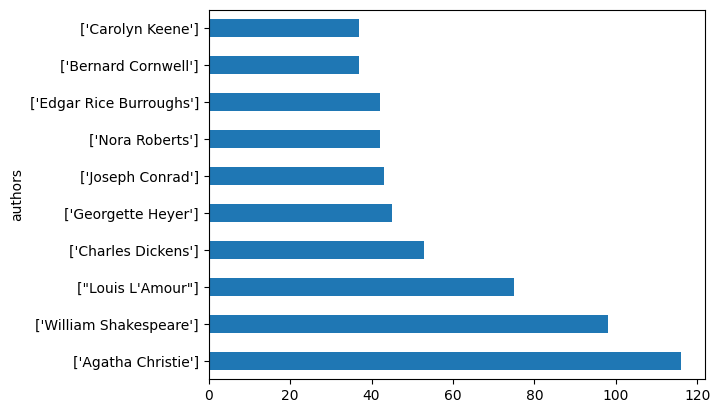

In [5]:
val = ['Library of Congress. Copyright Office']
book_data.query("authors in @val")

book_data['authors'].value_counts().head(10).plot(kind='barh')

print(book_data[book_data['authors']==val[0]])

Text(0.5, 1.0, 'Rating scores')

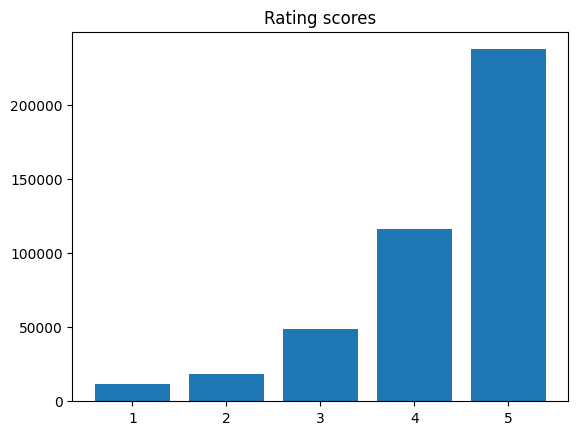

In [13]:
title = "Shaded Light (Manziuk and Ryan Mystery Series #1)"

book_ratings.query("title == @title")

ratings = book_ratings["score"].value_counts()

plt.bar(ratings.index, ratings.values)
plt.title("Rating scores")

In [17]:
book_ratings["bi rating"] = book_ratings["score"]>3

In [18]:
def sim_cal(user1,user2):
    val = 10
    
    us1 = book_ratings.query("user_id == @user1")[["title","bi rating"]]
    us2 = book_ratings.query("user_id == @user2")[["title","bi rating"]]


    len(book_ratings.user_id.unique())

    lists = pd.DataFrame()
    lists["title"] = (np.concatenate((us1.title,us2.title)))

    merged_data = pd.merge(lists, us1, on='title', how='left')
    merged_data = pd.merge(merged_data, us2, on='title', how='left')

    merged_data = merged_data.dropna()
    merged_data = merged_data.groupby(["title"]).mean()

    sim = sum(merged_data["bi rating_x"] == merged_data["bi rating_y"])/max(len(merged_data),val)
    return sim

In [19]:
value = 5000
user1 = "A2WZON0QPX7C9X"
user1_sim = []
for i,user2 in enumerate(book_ratings["user_id"].unique()[0:value]):
    user1_sim.append(sim_cal(user1,user2))
    if i%1000 == 0:
        print(i)


0
1000


In [ ]:
users2 = book_ratings["user_id"].unique()[0:value]
users2 = pd.DataFrame(users2)

users2["sim"]=user1_sim
users2.sort_values(by=['sim'], ascending=False)[0:10]

,0,sim
195,AWLFVCT9128JV,1.000000
199,AKBH21PTTCWVJ,1.000000
265,A96K1ZGW56S2I,1.000000
4,A2VCGJLKGK2WJJ,1.000000
496,A2O9HU1K7TCF7B,1.000000
209,A2XAWBF5J47ECS,1.000000
916,AMX0PJKV4PPNJ,1.000000
485,A3E8QNDC7CV44,1.000000
13,A2WZON0QPX7C9X,1.000000
693,A1M4NJYP0WNL8Q,0.909091


In [ ]:
val = 10
user = "A2WZON0QPX7C9X"
user2 = "A2VCGJLKGK2WJJ"

us1 = book_ratings.query("user_id == @user")[["title","bi rating"]]
us2 = book_ratings.query("user_id == @user2")[["title","bi rating"]]


len(book_ratings.user_id.unique())


#us1
#us2

#pd.concat([us1.title.unique(), us2.title.unique())
lists = pd.DataFrame()
lists["title"] = (np.concatenate((us1.title,us2.title)))

merged_data = pd.merge(lists, us1, on='title', how='left')
merged_data = pd.merge(merged_data, us2, on='title', how='left')

merged_data = merged_data.dropna()
merged_data = merged_data.groupby(["title"]).mean()

sim = sum(merged_data["bi rating_x"] == merged_data["bi rating_y"])/max(len(merged_data),val)

sim
merged_data

,bi rating_x,bi rating_y
title,,
ascension,1.0,1.0
austere academy,1.0,1.0
demon in my view,1.0,1.0
power of two,1.0,1.0
prowlers,1.0,1.0
shattered mirror,1.0,1.0
survivor,1.0,1.0
the hermit thrush sings,1.0,1.0
the princess diaries,1.0,1.0
